## Kaggle Titanic Dataset - Prediction of Survival

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data

In [4]:
dfTR = pd.read_csv('./Data/train.csv')
dfTR.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## Show dataframe info
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
## Show dataframe description
dfTR.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Clean Data

In [7]:
## Show dataframe null counts
dfTR.isnull().sum()
#to show by row: dfTR.isnull().sum(axis=1) (the above is default axis = 0)
# Shows you how many null rows are in each category - so for instance Cabin might be a good candidate to be removed.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dfTR[(dfTR.isnull().sum(axis=1) >1)].shape #shape of list of True and False depending on whether the row has 2+ null values

(158, 12)

In [9]:
dfTR.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
dfTR.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
## Select columns
SEL_COLS = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
dfTR = dfTR[SEL_COLS]
dfTR.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
## Drop NAs
dfTR = dfTR.dropna()
dfTR.shape

(712, 8)

In [13]:
## View distributions
SEL_VAR = SEL_COLS[0]                  ## Change index for other variables
dfTR.groupby(SEL_VAR).count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,424,424,424,424,424,424,424
1,288,288,288,288,288,288,288


### Visualize Data

   #### Survival counts

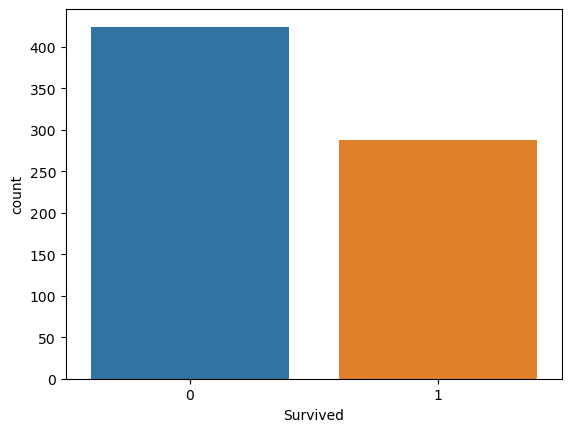

In [14]:
sns.countplot(data = dfTR, x='Survived')
plt.show()

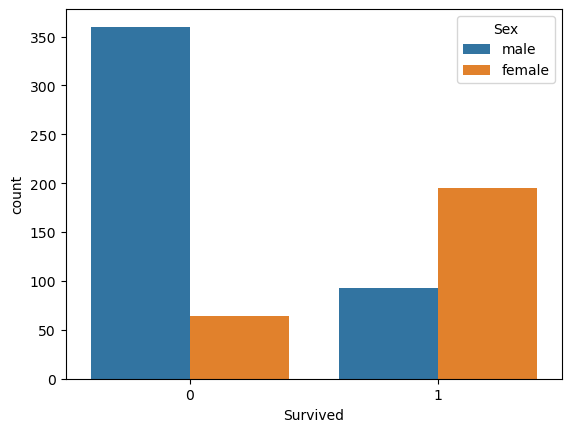

In [15]:
sns.countplot(data=dfTR, x='Survived', hue='Sex')
plt.show()

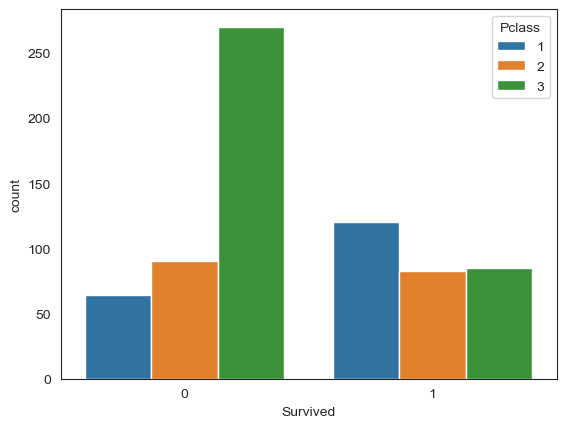

In [16]:
sns.set_style('white')
sns.countplot(data=dfTR, x='Survived', hue='Pclass')
plt.show()

   #### Age of the passengers

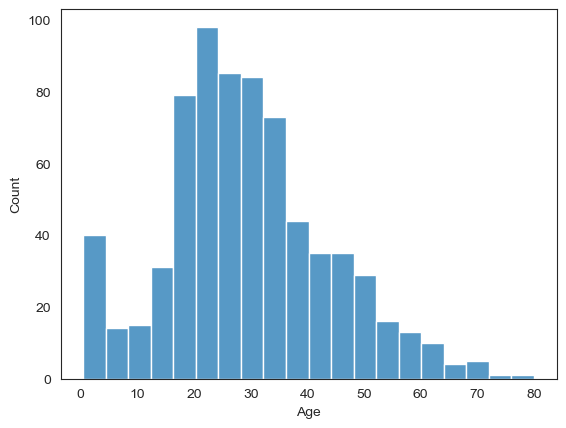

In [17]:
sns.histplot(data=dfTR, x='Age')
plt.show()

#### Siblings and Spouse count

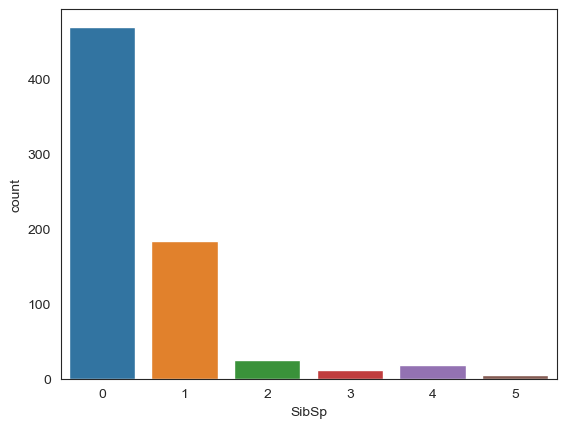

In [18]:
sns.countplot(data=dfTR, x='SibSp')
plt.show()

#### Distribution of Fares

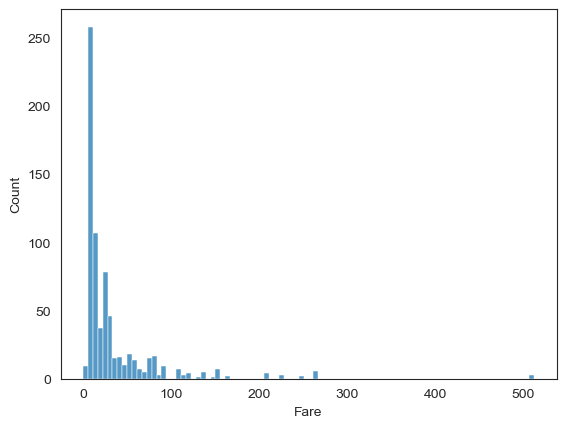

In [19]:
sns.histplot(data=dfTR, x='Fare')
plt.show()

### Handle Categorical Variables

In [20]:
dfSex = pd.get_dummies(dfTR['Sex'], prefix='Sex', drop_first=True) #function to create a dummy variable for you based on a categorical variable you give it
dfSex.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [21]:
dfEmb = pd.get_dummies(dfTR['Embarked'], prefix='Emb', drop_first=True)
dfEmb.head()

,Emb_Q,Emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
dfTR=pd.concat([dfTR.drop(['Sex','Embarked'],axis=1), dfSex, dfEmb], axis=1) # drop Sex and Embarked, concatenate on the dummary vars of Sex and Embarked previously created
dfTR.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Emb_Q,Emb_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### ML Models for Prediction

### Scale the data

In [23]:
from sklearn.preprocessing import StandardScaler
scalerTR = StandardScaler()

In [24]:
XTR = np.array(dfTR[dfTR.columns[1:]]) # convert to np array. This is my input data (all columns except Survived).
XTR.shape

(712, 8)

In [25]:
YTR = np.array(dfTR[dfTR.columns[0:1]]).squeeze() # output data (only Survived column). converted to np array
YTR.shape

(712,)

In [26]:
scalerTR.fit(XTR) # learns the parameters
XTRNorm = scalerTR.transform(XTR)

In [27]:
scalerTR.mean_ # see the mean for each observation
scalerTR.var_ # see the variance for each observation

array([6.99341545e-01, 2.09750097e+02, 8.64971279e-01, 7.28601187e-01,
       2.79856437e+03, 2.31439765e-01, 3.77793208e-02, 1.72666014e-01])

In [28]:
XTRNorm.mean(axis=1) # means for each row
XTRNorm.mean(axis=0) #means for each variable. they're basically zero

array([-1.39713459e-16,  2.94396218e-16, -1.49692992e-17,  1.49692992e-17,
       -6.73618464e-17, -3.74232480e-17,  1.74641824e-17,  1.28486485e-16])

### Version 1: Train - Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XTRNorm, YTR, test_size = 0.3, random_state = 101)

### 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression() # model description

In [ ]:
# side note - in python you can create loop to go through functions.
# since in python functions themselves are objects
# example
for tmpmdl in [svm, log, knn]: # would need to define svm at support vector machine, log as a log regression, etc
    tmpmdl.fit(X_train, Y_train)
    y_pred = tmpmdl.predict(Y_test)


In [31]:
mdl.fit(X_train,Y_train)

LogisticRegression()

In [35]:
# get model parameters
mdl.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
# see estimates of coefficients of features
mdl.coef_ # eight coefficients - matches our eight features

array([[-1.04503065, -0.61271342, -0.30601155, -0.0369976 ,  0.08192801,
        -1.30804903, -0.10498074, -0.06857236]])

In [37]:
# see estimate of intercept
mdl.intercept_

array([-0.48091339])

In [32]:
pred = mdl.predict(X_test) # make sure you did the fit first, before this
pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [33]:
Y_test

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
print(accuracy_score(Y_test,pred))

0.794392523364486


In [43]:
# alternatively, to calculate accuracy
np.sum(pred==Y_test) # sum where pred and Y_test are both 1 (positive)
# result: 170 true positives.
# this is out of 214, which we can figure out by running the shape of Y_test:
Y_test.shape

# So accuracy = 170/214 = 0.79439

0.794392523364486

In [44]:
print(classification_report(Y_test,pred)) # confusion matrix

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       128
           1       0.76      0.72      0.74        86

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [45]:
# alternatively for confusion matrix
confusion_matrix(Y_test, pred)

array([[108,  20],
       [ 24,  62]], dtype=int64)

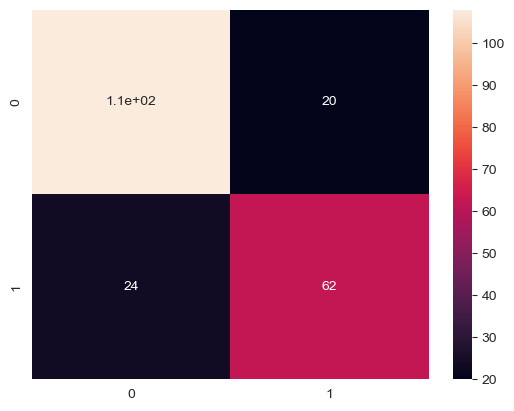

In [46]:
sns.heatmap(confusion_matrix(Y_test,pred), annot=True)
plt.show()

### 2. K-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# define objects
knn = KNeighborsClassifier(n_neighbors=10) # knn is a smoothing function: takes average of n_neighbors
# if you up the n_neighbors, accuracy will also (probably) increase

In [54]:
# fit
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
# predict
knnpredict = knn.predict(X_test)
knnpredict

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [56]:
print(accuracy_score(Y_test,knnpredict)) # in ML, don't want to always lower error: want to increase generalizability

0.8317757009345794


In [57]:
print(classification_report(Y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       128
           1       0.85      0.71      0.77        86

    accuracy                           0.83       214
   macro avg       0.84      0.81      0.82       214
weighted avg       0.83      0.83      0.83       214



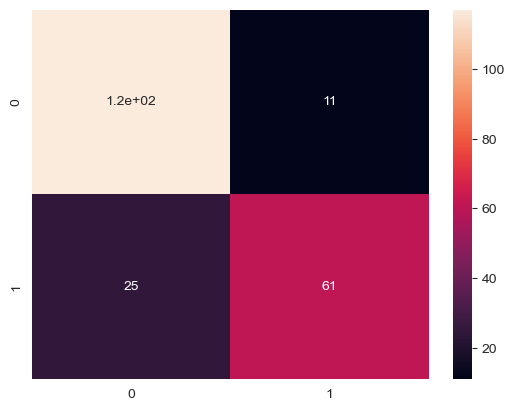

In [58]:
sns.heatmap(confusion_matrix(Y_test,knnpredict),annot=True)
plt.show()

### 3 - Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree = DecisionTreeClassifier() # create object

In [61]:
dtree.fit(X_train,Y_train) # fit

DecisionTreeClassifier()

In [62]:
treepredict = dtree.predict(X_test) # predict
treepredict

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [63]:
print(accuracy_score(Y_test,treepredict))

0.7663551401869159


In [64]:
print(classification_report(Y_test,treepredict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       128
           1       0.71      0.70      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



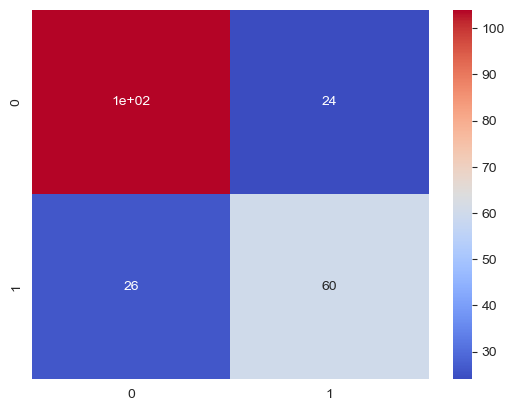

In [65]:
sns.heatmap(confusion_matrix(Y_test,treepredict),cmap='coolwarm',annot=True)
plt.show()

### 4 - Random Forest

### <center> 4.1 Random Forest with 10 estimators

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 10)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [67]:
rfcpredict_10 = rfc.predict(X_test)
rfcpredict_10

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [68]:
print(accuracy_score(Y_test,rfcpredict_10))

0.8084112149532711


In [69]:
print(classification_report(Y_test,rfcpredict_10))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       128
           1       0.78      0.72      0.75        86

    accuracy                           0.81       214
   macro avg       0.80      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214



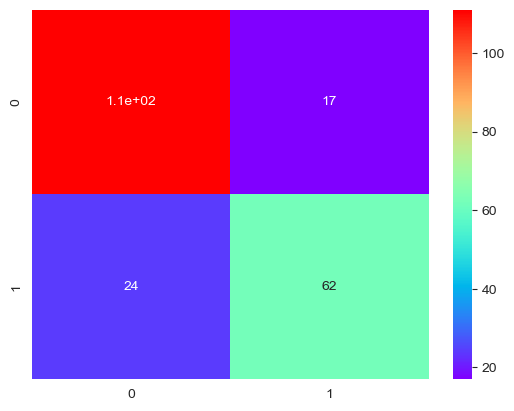

In [70]:
sns.heatmap(confusion_matrix(Y_test,rfcpredict_10),cmap='rainbow',annot=True)
plt.show()

### <center> 4.2 Random Forest with 100 estimators

In [71]:
rfc_100 = RandomForestClassifier(n_estimators=100)
rfc_100.fit(X_train,Y_train)

RandomForestClassifier()

In [72]:
rfcpredict_100 = rfc_100.predict(X_test)
rfcpredict_100

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [73]:
print(accuracy_score(Y_test,rfcpredict_100))

0.7850467289719626


In [74]:
print(classification_report(Y_test,rfcpredict_100))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       128
           1       0.74      0.71      0.73        86

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



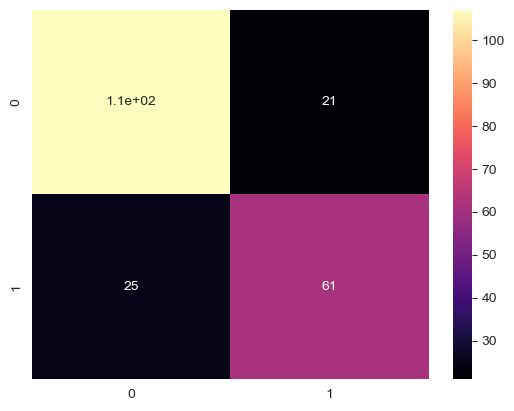

In [75]:
sns.heatmap(confusion_matrix(Y_test,rfcpredict_100),annot= True, cmap='magma')
plt.show()

### 5 - Support Vector Machines

In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [117]:
svc_predict = svc.predict(X_test)
svc_predict

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [118]:
print(accuracy_score(Y_test,svc_predict))

0.8037383177570093


In [119]:
print(classification_report(Y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       128
           1       0.78      0.71      0.74        86

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



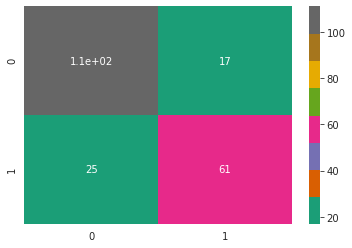

In [120]:
sns.heatmap(confusion_matrix(Y_test,svc_predict),cmap='Dark2',annot=True)
plt.show()